" Example 11.5: Multistage Compression with Intercooling"

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
R-134a flows through a vapor-compression refrigeration cycle.  Heat is removed at a rate of 18 kW from a freezer at $-8^\circ\mathrm{C}$.  Heat is rejected to a room at $22^\circ\mathrm{C}$.  The evaporator and the condenser are $10^\circ\mathrm{C}$ colder or hotter than the thermal reservoirs.  A flash chamber is used to separate the vapor from the liquid at a pressure of $4\ \mathrm{bar}$.  The vapor portion is used to intercool multistage compression. Find:
* (a) $p_\mathrm{evap}$ and $p_\mathrm{cond}$ (kPa)
* (b) $COP_R$
* (c) Net Work
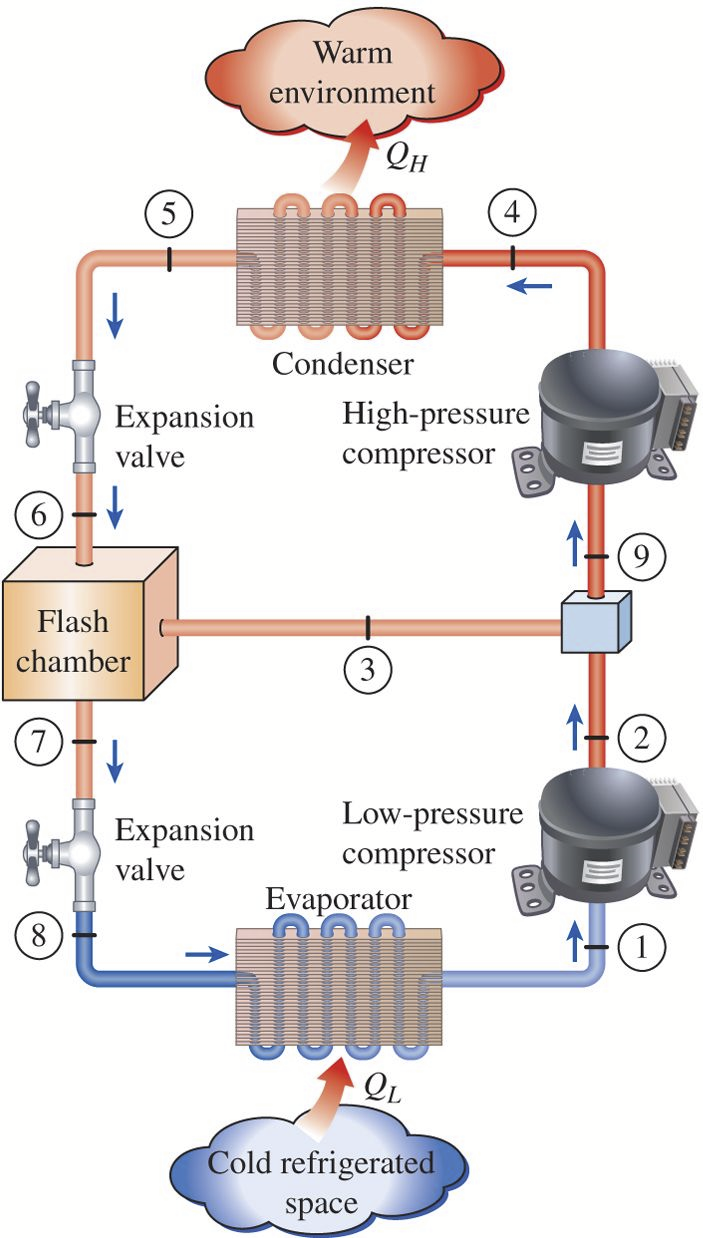

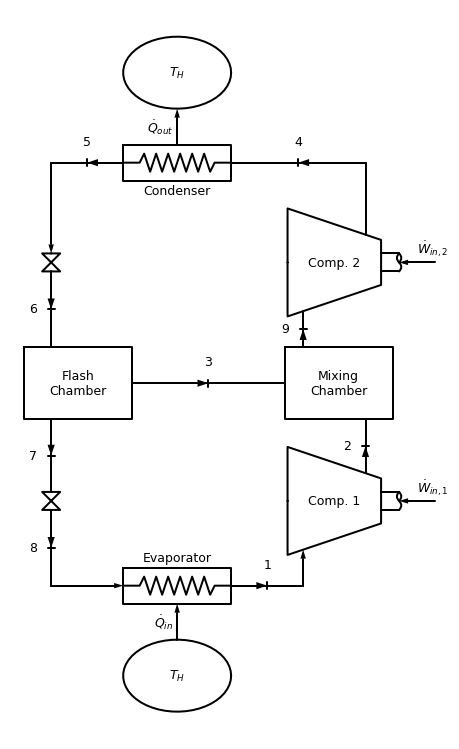

In [4]:
from IPython.display import Image
# import schematics
# schematics.refrigeration_2_stage_compression(file='Figures/refrigeration_2_stage_compression.png');
Image('Figures/refrigeration_2_stage_compression.png')

## Solution

__[Video Explanation](https://uky.yuja.com/V/Video?v=2005386&node=7667546&a=1041408079&autoplay=1)__

### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [6]:
from kilojoule.templates.default import *

r134a = realfluid.Properties('R134a')

### Given Parameters
We now define variables to hold our known values.

In [8]:
Qdot_in = Quantity(18, 'kW')  # Rate of heat input
T_L = Quantity(-8, 'degC')  # Temperature of refrigerated space
T_H = Quantity(22, 'degC')  # Temperature of surroundings
Delta_T = Quantity(
    10, 'delta_degC')  # Temperature difference in evaporator and condenser
p_flash = Quantity(4, 'bar')  # Flash chamber pressure

Summary(show=True);

<IPython.core.display.Latex object>

""


### Assumptions
- Ideal work devices
- Saturated vapor at evaporator exit
- Saturated liquid at condenser exit
- Flash chamber exits are saturated vapor and liquid
- Isobaric heat exchangers
- Negligible changes in kinetic energy
- Negligible changes in potential energy

In [9]:
x[1] = 1  # Saturated vapor at evaporator exit
x[5] = 0  # Saturated liquid at condenser exit
x[7] = 0  # Saturated liquid at flash chamber exit
x[3] = 1  # Saturated vapor at flash chamber exit
p[6] = p[7] = p[3] = p[2] = p[9] = p_flash  # isobaric heat exchangers

Summary(show=True);

<IPython.core.display.Latex object>

,$p$ [kPa],$x$ []
1,-,1.0
2,400.0,-
3,400.0,1.0
5,-,0.0
6,400.0,-
7,400.0,0.0
9,400.0,-


### (a) Pressures in condenser and evaporator

In [11]:
%%showcalc
"### Evaporator pressure"
"The working fluid temperature must be lower than the refrigerated space"
T[1] = T_L - Delta_T
"The fluid is saturated, so the saturation pressure must be consistent with the saturation temperature"
p[1] = r134a.p(T[1], x[1])
"### Condenser pressure"
"The working fluid temperature must be hotter than the surroundings"
T[5] = T_H + Delta_T
"The fluid is saturated, so the saturation pressure must be consistent with the saturation temperature"
p[5] = r134a.p(T[5], x[5])

### Evaporator pressure
The working fluid temperature must be lower than the refrigerated space
\begin{align}
  {T}_{ 1 } &=   T_{L} - \Delta{}T  \\
    &=  -8\ \mathrm{°C} - 10\ \mathrm{Δ°C} \\
    &= 255.15\ \mathrm{K}
\end{align}

The fluid is saturated, so the saturation pressure must be consistent with the saturation temperature
\begin{align}
  {p}_{ 1 } &=  \mathrm{ \underset{ r134a }{ p } }\left( {T}_{ 1 }, {x}_{ 1 } \right)  = \mathrm{ \underset{ r134a }{ p } }\left( 255.15\ \mathrm{K}, 1 \right) = 144.6\ \mathrm{kPa}
\end{align}

### Condenser pressure
The working fluid temperature must be hotter than the surroundings
\begin{align}
  {T}_{ 5 } &=  T_{H} + \Delta{}T \\
    &= 22\ \mathrm{°C} + 10\ \mathrm{Δ°C}\\
    &= 305.15\ \mathrm{K}
\end{align}

The fluid is saturated, so the saturation pressure must be consistent with the saturation temperature
\begin{align}
  {p}_{ 5 } &=  \mathrm{ \underset{ r134a }{ p } }\left( {T}_{ 5 }, {x}_{ 5 } \right)  = \mathrm{ \underset{ r134a }{ p } }\left( 305.15\ \mathrm{K}, 0 \right) = 815.43\ \mathrm{kPa}
\end{align}



### (b) $COP_R$

In [12]:
%%showcalc
"### 1st Law Analysis"
"#### State 5"
h[5] = r134a.h(p[5], x[5])
"#### State 6"
h[6] = h[5]
x[6] = r134a.x(p[6], h=h[6])
"#### State 7"
h[7] = r134a.h(p[7], x=0)
"### State 8"
h[8] = h[7]
p[8] = p[1]
"#### State 1"
h[1] = r134a.h(T[1], x[1])
s[1] = r134a.s(T[1], x[1])
"#### 8-1) Isobaric heat addition"
q_in = h[1] - h[8]
"#### Mass flow rate"
mdot[1] = mdot[2] = mdot[8] = mdot[7] = Qdot_in / q_in
"#### 1-2) Ideal compression"
p[2] = p[3]
s[2] = s[1]
"#### State 2"
T[2] = r134a.T(p[2], s[2])
h[2] = r134a.h(p[2], s[2])
"#### 2,3-9) "
"#### State 3"
h[3] = r134a.h(p[3], x[3])
"#### Mass flow rate"
mdot[3] = x[6] * mdot[1]
"#### State 9"
mdot[9] = mdot[4] = mdot[5] = mdot[6] = mdot[1] + mdot[3]
h[9] = (mdot[2] * h[2] + mdot[3] * h[3]) / mdot[9]
"#### 9-4) Ideal compression"
s[9] = r134a.s(p[9], h=h[9])
p[4] = p[5]
s[4] = s[9]
h[4] = r134a.h(p[4], s[4])
"#### COP"
"Desired: Heat Input"
"Cost: Net Work"
Wdot_net = mdot[1] * (h[2] - h[1]) + mdot[9] * (h[4] - h[9])
"COP: Desired/Cost"
COP_R = Qdot_in / Wdot_net

### 1st Law Analysis
#### State 5
\begin{align}
  {h}_{ 5 } &=  \mathrm{ \underset{ r134a }{ h } }\left( {p}_{ 5 }, {x}_{ 5 } \right)  = \mathrm{ \underset{ r134a }{ h } }\left( 815.43\ \mathrm{kPa}, 0 \right) = 244.62\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

#### State 6
\begin{align}
  {h}_{ 6 } &=  {h}_{ 5 }  = 244.62\ \frac{\mathrm{kJ}}{\mathrm{kg}} 
\end{align}

\begin{align}
  {x}_{ 6 } &=  \mathrm{ \underset{ r134a }{ x } }\left( {p}_{ 6 }, \mathrm{ h } = {h}_{ 6 } \right)  = \mathrm{ \underset{ r134a }{ x } }\left( 400.0\ \mathrm{kPa}, \mathrm{ h } = 244.62\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 0.16968
\end{align}

#### State 7
\begin{align}
  {h}_{ 7 } &=  \mathrm{ \underset{ r134a }{ h } }\left( {p}_{ 7 }, \mathrm{ x } = 0 \right)  = \mathrm{ \underset{ r134a }{ h } }\left( 400.0\ \mathrm{kPa}, \mathrm{ x } = 0 \right) = 212.11\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

### State 8
\begin{align}
  {h}_{ 8 } &=  {h}_{ 7 }  = 212.11\ \frac{\mathrm{kJ}}{\mathrm{kg}} 
\end{align}

\begin{align}
  {p}_{ 8 } &=  {p}_{ 1 }  = 144.6\ \mathrm{kPa} 
\end{align}

#### State 1
\begin{align}
  {h}_{ 1 } &=  \mathrm{ \underset{ r134a }{ h } }\left( {T}_{ 1 }, {x}_{ 1 } \right)  = \mathrm{ \underset{ r134a }{ h } }\left( 255.15\ \mathrm{K}, 1 \right) = 387.79\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  {s}_{ 1 } &=  \mathrm{ \underset{ r134a }{ s } }\left( {T}_{ 1 }, {x}_{ 1 } \right)  = \mathrm{ \underset{ r134a }{ s } }\left( 255.15\ \mathrm{K}, 1 \right) = 1.7396\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

#### 8-1) Isobaric heat addition
\begin{align}
  q_{in} &=   {h}_{ 1 } - {h}_{ 8 }  \\
    &=  387.79\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 212.11\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 175.68\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

#### Mass flow rate
\begin{align}
  {\dot{m}}_{ 1 } &= {\dot{m}}_{ 2 } = {\dot{m}}_{ 8 } = {\dot{m}}_{ 7 } =  \frac{ \dot{Q}_{in} }{ q_{in} } \\
    &= \frac{ 18\ \mathrm{kW} }{ 175.68\ \frac{\mathrm{kJ}}{\mathrm{kg}} }\\
    &= 0.10246\ \frac{\mathrm{kg}}{\mathrm{s}}
\end{align}

#### 1-2) Ideal compression
\begin{align}
  {p}_{ 2 } &=  {p}_{ 3 }  = 400.0\ \mathrm{kPa} 
\end{align}

\begin{align}
  {s}_{ 2 } &=  {s}_{ 1 }  = 1.7396\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} 
\end{align}

#### State 2
\begin{align}
  {T}_{ 2 } &=  \mathrm{ \underset{ r134a }{ T } }\left( {p}_{ 2 }, {s}_{ 2 } \right)  = \mathrm{ \underset{ r134a }{ T } }\left( 400.0\ \mathrm{kPa}, 1.7396\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 287.25\ \mathrm{K}
\end{align}

\begin{align}
  {h}_{ 2 } &=  \mathrm{ \underset{ r134a }{ h } }\left( {p}_{ 2 }, {s}_{ 2 } \right)  = \mathrm{ \underset{ r134a }{ h } }\left( 400.0\ \mathrm{kPa}, 1.7396\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 408.55\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

#### 2,3-9) 
#### State 3
\begin{align}
  {h}_{ 3 } &=  \mathrm{ \underset{ r134a }{ h } }\left( {p}_{ 3 }, {x}_{ 3 } \right)  = \mathrm{ \underset{ r134a }{ h } }\left( 400.0\ \mathrm{kPa}, 1 \right) = 403.72\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

#### Mass flow rate
\begin{align}
  {\dot{m}}_{ 3 } &=   {x}_{ 6 }  \cdot  {\dot{m}}_{ 1 }  \\
    &=  0.16968  \cdot  0.10246\ \frac{\mathrm{kg}}{\mathrm{s}} \\
    &= 0.017385\ \frac{\mathrm{kg}}{\mathrm{s}}
\end{align}

#### State 9
\begin{align}
  {\dot{m}}_{ 9 } &= {\dot{m}}_{ 4 } = {\dot{m}}_{ 5 } = {\dot{m}}_{ 6 } =  {\dot{m}}_{ 1 } + {\dot{m}}_{ 3 } \\
    &= 0.10246\ \frac{\mathrm{kg}}{\mathrm{s}} + 0.017385\ \frac{\mathrm{kg}}{\mathrm{s}}\\
    &= 0.11985\ \frac{\mathrm{kg}}{\mathrm{s}}
\end{align}

\begin{align}
  {h}_{ 9 } &=  \frac{  {\dot{m}}_{ 2 }  \cdot  {h}_{ 2 }  +  {\dot{m}}_{ 3 }  \cdot  {h}_{ 3 }  }{ {\dot{m}}_{ 9 } } \\
    &= \frac{  0.10246\ \frac{\mathrm{kg}}{\mathrm{s}}  \cdot  408.55\ \frac{\mathrm{kJ}}{\mathrm{kg}}  +  0.017385\ \frac{\mathrm{kg}}{\mathrm{s}}  \cdot  403.72\ \frac{\mathrm{kJ}}{\mathrm{kg}}  }{ 0.11985\ \frac{\mathrm{kg}}{\mathrm{s}} }\\
    &= 407.85\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

#### 9-4) Ideal compression
\begin{align}
  {s}_{ 9 } &=  \mathrm{ \underset{ r134a }{ s } }\left( {p}_{ 9 }, \mathrm{ h } = {h}_{ 9 } \right)  = \mathrm{ \underset{ r134a }{ s } }\left( 400.0\ \mathrm{kPa}, \mathrm{ h } = 407.85\ \frac{\mathrm{kJ}}{\mathrm{kg}} \right) = 1.7371\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)}
\end{align}

\begin{align}
  {p}_{ 4 } &=  {p}_{ 5 }  = 815.43\ \mathrm{kPa} 
\end{align}

\begin{align}
  {s}_{ 4 } &=  {s}_{ 9 }  = 1.7371\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} 
\end{align}

\begin{align}
  {h}_{ 4 } &=  \mathrm{ \underset{ r134a }{ h } }\left( {p}_{ 4 }, {s}_{ 4 } \right)  = \mathrm{ \underset{ r134a }{ h } }\left( 815.43\ \mathrm{kPa}, 1.7371\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} \right) = 422.97\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

#### COP
Desired: Heat Input
Cost: Net Work
\begin{align}
  \dot{W}_{net} &=   {\dot{m}}_{ 1 }  \cdot  \left(  {h}_{ 2 } - {h}_{ 1 }  \right)  +  {\dot{m}}_{ 9 }  \cdot  \left(  {h}_{ 4 } - {h}_{ 9 }  \right)  \\
    &=  0.10246\ \frac{\mathrm{kg}}{\mathrm{s}}  \cdot  \left(  408.55\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 387.79\ \frac{\mathrm{kJ}}{\mathrm{kg}}  \right)  +  0.11985\ \frac{\mathrm{kg}}{\mathrm{s}}  \cdot  \left(  422.97\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 407.85\ \frac{\mathrm{kJ}}{\mathrm{kg}}  \right) \\
    &= 3.94\ \frac{\mathrm{kJ}}{\mathrm{s}}
\end{align}

COP: Desired/Cost
\begin{align}
  COP_{R} &=  \frac{ \dot{Q}_{in} }{ \dot{W}_{net} } \\
    &= \frac{ 18\ \mathrm{kW} }{ 3.94\ \frac{\mathrm{kJ}}{\mathrm{s}} }\\
    &= 4.5685\ \frac{\mathrm{kW} \cdot \mathrm{s}}{\mathrm{kJ}}
\end{align}



### (c) Net Work

In [13]:
%%showcalc
"Solved in Part (b)"
Wdot_net = Wdot_net

Solved in Part (b)
\begin{align}
  \dot{W}_{net} &=  \dot{W}_{net}  = 3.94\ \frac{\mathrm{kJ}}{\mathrm{s}} 
\end{align}



### Diagrams

In [14]:
# Remaining properties
for i in range(1, 10):
    states.fix(i, r134a)

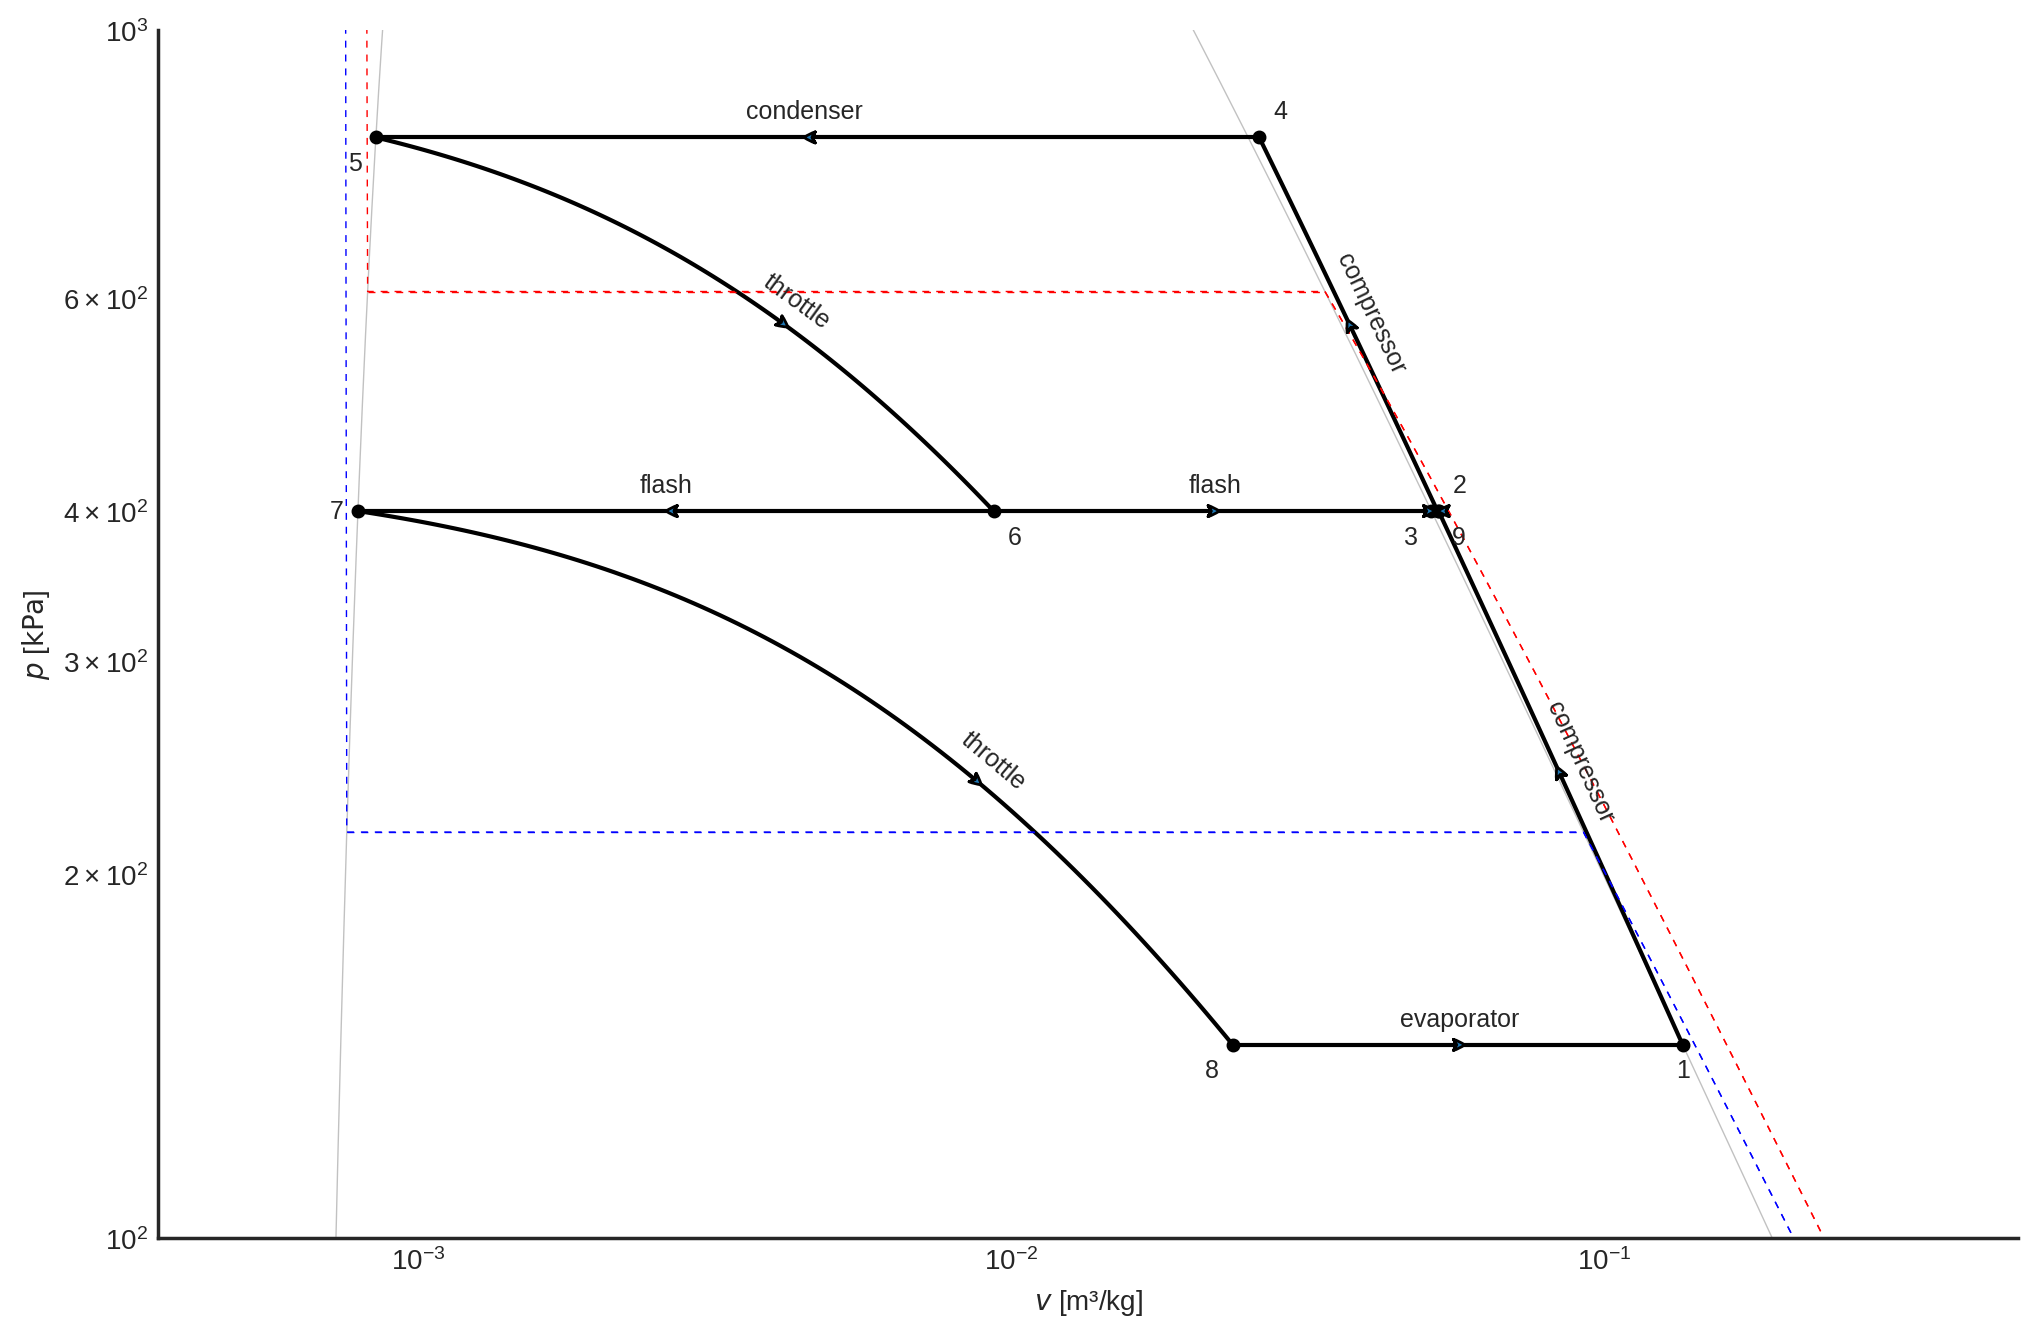

In [15]:
pv = r134a.pv_diagram()
pv.ax.set_ylim(bottom=100, top=1000)
pv.ax.set_xlim(right=.5)

pv.plot_state(states[1], label_loc='south')
pv.plot_state(states[2], label_loc='north east')
pv.plot_state(states[3], label_loc='south west')
pv.plot_state(states[4], label_loc='north east')
pv.plot_state(states[5], label_loc='south west')
pv.plot_state(states[6], label_loc='south east')
pv.plot_state(states[7], label_loc='west')
pv.plot_state(states[8], label_loc='south west')
pv.plot_state(states[9], label_loc='south east')

pv.plot_process(states[1], states[2], path='isentropic', label='compressor')
pv.plot_process(states[2], states[9], path='isobaric')
pv.plot_process(states[3], states[9], path='isobaric')
pv.plot_process(states[9], states[4], path='isentropic', label='compressor')
pv.plot_process(states[4], states[5], path='isobaric', label='condenser')
pv.plot_process(states[5], states[6], path='isenthalpic', label='throttle')
pv.plot_process(states[6], states[7], path='isobaric', label='flash')
pv.plot_process(states[6], states[3], path='isobaric', label='flash')
pv.plot_process(states[7], states[8], path='isenthalpic', label='throttle')
pv.plot_process(states[8], states[1], path='isobaric', label='evaporator')

# Plot Reference Isotherms for refrigerated space and surroundings
# Refrigerated space
pv.plot_isotherm(T_L, color='blue', label=False)
# Surrounding temperature
pv.plot_isotherm(T_H, color='red', label=False);

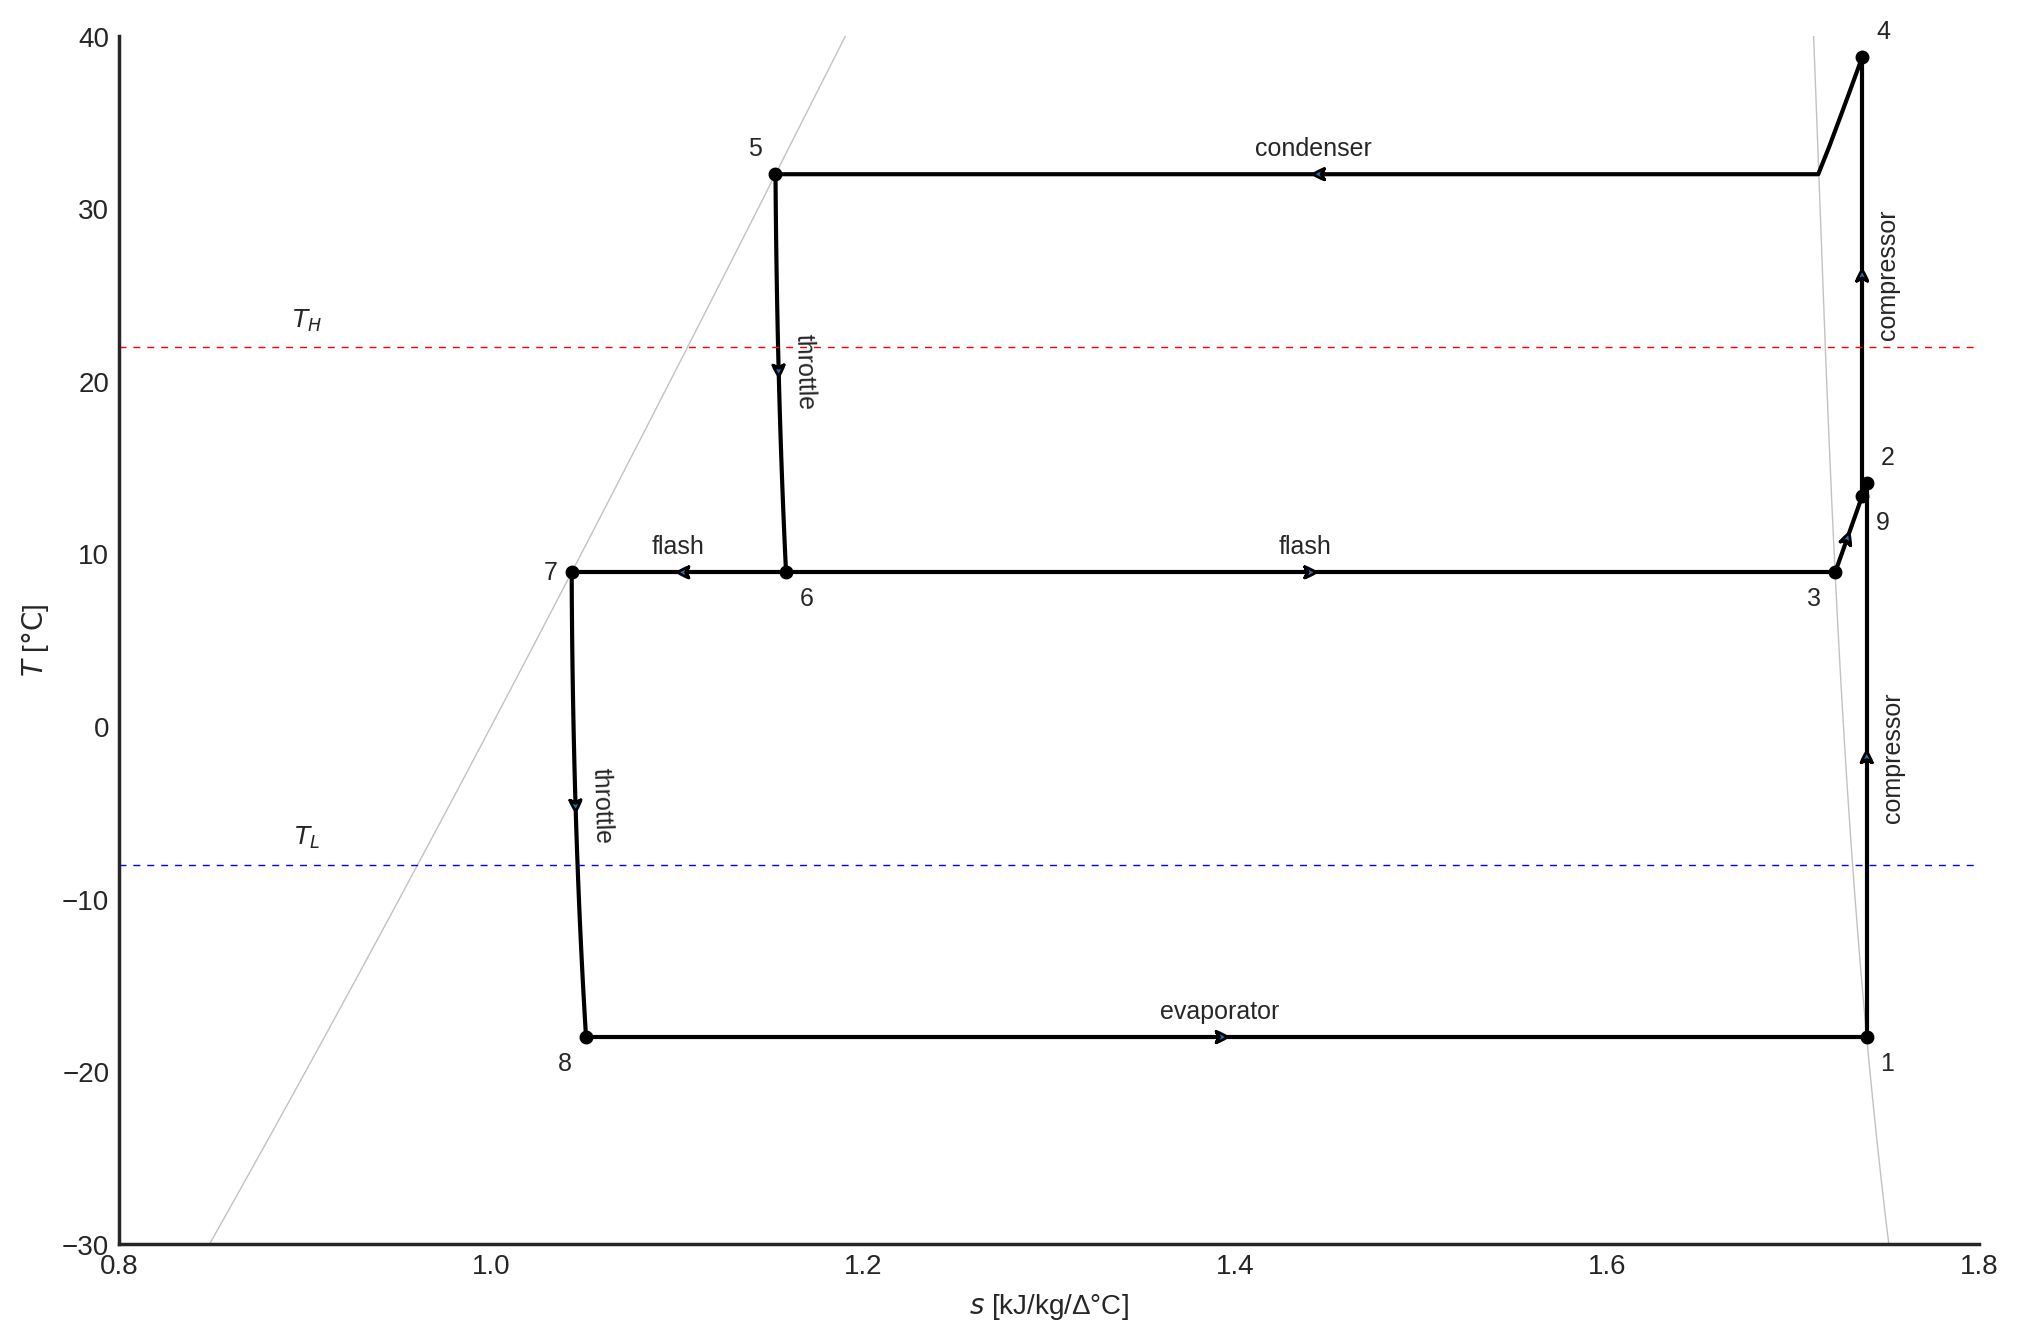

In [16]:
Ts = r134a.Ts_diagram()
Ts.ax.set_ylim(bottom=-30, top=40)
Ts.ax.set_xlim(left=.8, right=1.8)

Ts.plot_state(states[1], label_loc='south east')
Ts.plot_state(states[2], label_loc='north east')
Ts.plot_state(states[3], label_loc='south west')
Ts.plot_state(states[4], label_loc='north east')
Ts.plot_state(states[5], label_loc='north west')
Ts.plot_state(states[6], label_loc='south east')
Ts.plot_state(states[7], label_loc='west')
Ts.plot_state(states[8], label_loc='south west')
Ts.plot_state(states[9], label_loc='south east')

Ts.plot_process(states[1],
                states[2],
                path='isentropic',
                label='compressor',
                labelprops=dict(va='top'))
Ts.plot_process(states[2], states[9], path='isobaric', arrow=False)
Ts.plot_process(states[3], states[9], path='isobaric')
Ts.plot_process(states[9],
                states[4],
                path='isentropic',
                label='compressor',
                labelprops=dict(va='top'))
Ts.plot_process(states[4], states[5], path='isobaric', label='condenser')
Ts.plot_process(states[5], states[6], path='isenthalpic', label='throttle')
Ts.plot_process(states[6], states[7], path='isobaric', label='flash')
Ts.plot_process(states[6], states[3], path='isobaric', label='flash')
Ts.plot_process(states[7], states[8], path='isenthalpic', label='throttle')
Ts.plot_process(states[8], states[1], path='isobaric', label='evaporator')

# Plot Reference Isotherms for refrigerated space and surroundings
Ts.plot_isotherm(T_L, color='blue', label='$T_L$', pos=.1)
Ts.plot_isotherm(T_H, color='red', label='$T_H$', pos=.1);

In [17]:
states.display();

,$T$ [K],$p$ [kPa],$v$ [m³/kg],$u$ [kJ/kg],$h$ [kJ/kg],$s$ [kJ/K/kg],$x$ [],$phase$ [],$\dot{m}$ [kg/s],$c_{v}$ [kJ/K/kg],$c_{p}$ [kJ/K/kg]
1,255.150000,144.600367,0.135923,368.133408,387.787860,1.739570,1,twophase,0.102461,0.710072,0.823198
2,287.254690,400.000000,0.052636,387.497380,408.551899,1.739570,N/A,gas,0.102461,0.785734,0.929040
3,282.080604,400.000000,0.051207,383.236695,403.719411,1.722593,1,twophase,0.017385,0.787209,0.940007
4,311.925815,815.426515,0.026224,401.590591,422.974478,1.737126,N/A,gas,0.119846,0.851748,1.046522
5,305.150000,815.426515,0.000848,243.931328,244.622621,1.152910,0,twophase,0.119846,0.921777,1.455904
6,282.080604,400.000000,0.009345,240.884551,244.622621,1.158582,0.169677,twophase,0.119846,3.524717,-0.372905
7,282.080604,400.000000,0.000791,211.794817,212.111109,1.043325,0,twophase,0.102461,0.890392,1.367017
8,255.150000,144.600367,0.023667,208.688810,212.111109,1.051047,0.169605,twophase,0.102461,2.279649,-25.149420
9,286.500616,400.000000,0.052431,386.878535,407.850884,1.737126,N/A,gas,0.119846,0.785730,0.930254


In [21]:
# Export your solution to submit to Canvas
# 1) Ensure all cells above show your final solution
# 2) Click the 'Save' button in the toolbar
# 3) Uncomment (remove the #) from the last line in this cell
# 4) Ensure the filename in the command below matches the filename of this notebook
# 4) Execute this cell to create an HTML file showing only the output 
# 5) Submit the .html file located in the folder with this notebook

# !jupyter nbconvert --to html --no-input --no-prompt "Ex11.5 Multistage Compression with Intercooling.ipynb"